<a href="https://colab.research.google.com/github/AbduzZami/ColabNotebooks/blob/main/GAU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/gaurice-1.jpeg')

Resized Image:


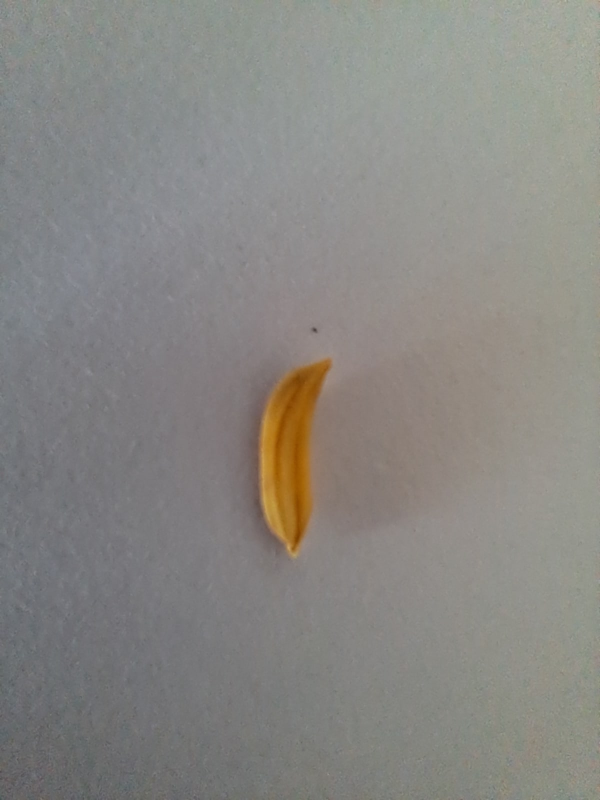

In [140]:
# Define the desired width (adjust as needed)
desired_width = 600

# Calculate the aspect ratio and new height
aspect_ratio = img.shape[1] / img.shape[0]
desired_height = int(desired_width / aspect_ratio)

# Resize the image
img = cv2.resize(img, (desired_width, desired_height))

# Display the resized image
print("Resized Image:")
cv2_imshow(img)

Image with Only White Color Range Kept:


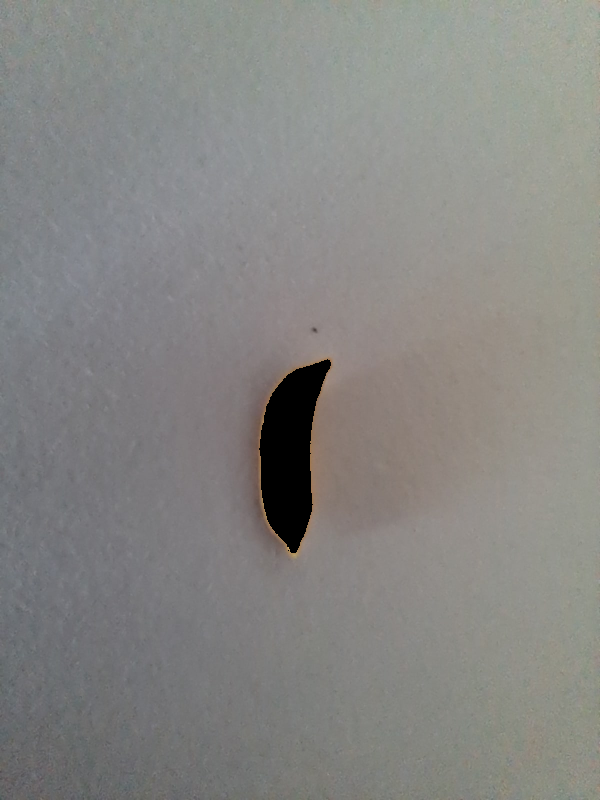

In [141]:
# Convert the image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the range for white color in HSV (adjust these values as needed)
# White is represented by high V (Value/Brightness)
lower_white = np.array([0, 0, 0])
upper_white = np.array([255, 127, 255]) # A wider range for saturation to include off-white

# Create a mask to isolate the white color
mask = cv2.inRange(hsv, lower_white, upper_white)

# Apply the mask to the original image to keep only the white areas
result_white = cv2.bitwise_and(img, img, mask=mask)

# Display the image with only the white areas
print("Image with Only White Color Range Kept:")
cv2_imshow(result_white)

Processed result_white with non-black pixels converted to white:


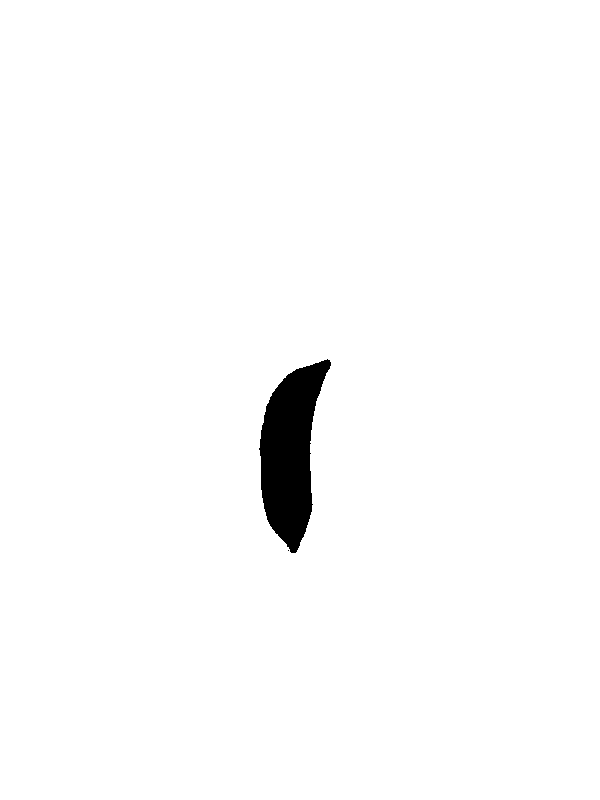

In [142]:
# Convert result_white to grayscale
gray_result_white = cv2.cvtColor(result_white, cv2.COLOR_BGR2GRAY)

# Create a mask where non-black pixels are white (255) and black pixels are black (0)
# Adjust the threshold value (e.g., 10) if there are near-black colors you want to consider black
ret, non_black_mask = cv2.threshold(gray_result_white, 10, 255, cv2.THRESH_BINARY)

# Create a white image of the same size as the original
white_img = np.full_like(img, 255, dtype=np.uint8)

# Use the non_black_mask to copy white pixels from the white_img to the areas where result_white was not black
result_non_black_white = cv2.bitwise_and(white_img, white_img, mask=non_black_mask)

# Use the inverted mask to keep the black areas from result_white
black_mask = cv2.bitwise_not(non_black_mask)
result_black_kept = cv2.bitwise_and(result_white, result_white, mask=black_mask)

# Combine the two results
final_processed_white = cv2.add(result_non_black_white, result_black_kept)


# Display the final image
print("Processed result_white with non-black pixels converted to white:")
cv2_imshow(final_processed_white)

Inverted Image:


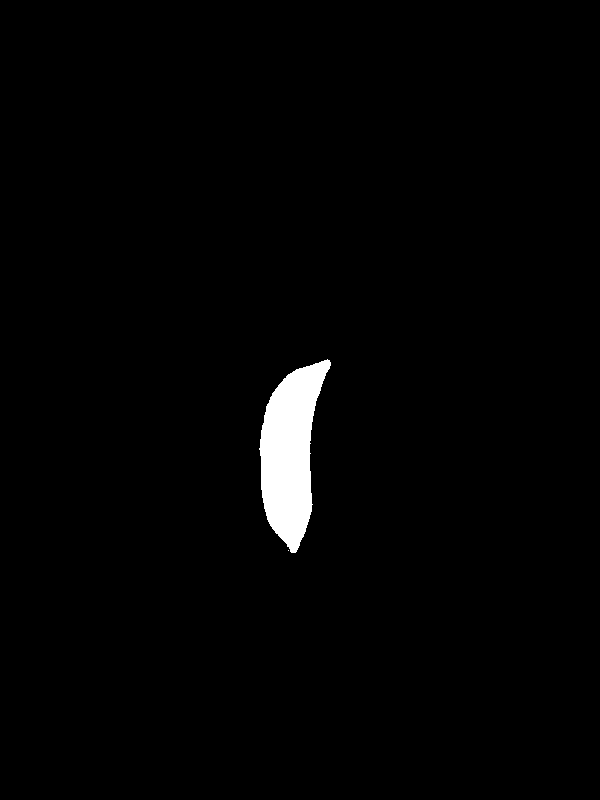

In [143]:
# Invert the colors of the image
inverted_img = cv2.bitwise_not(final_processed_white)

# Display the inverted image
print("Inverted Image:")
cv2_imshow(inverted_img)

Grayscale Inverted Image:


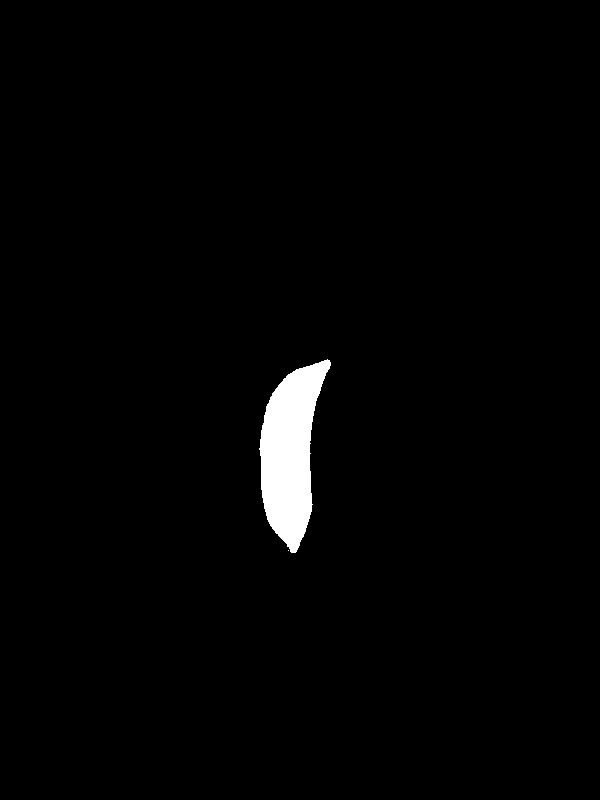

In [144]:
# Convert the inverted image to grayscale
gray_inverted_img = cv2.cvtColor(inverted_img, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
print("Grayscale Inverted Image:")
cv2_imshow(gray_inverted_img)

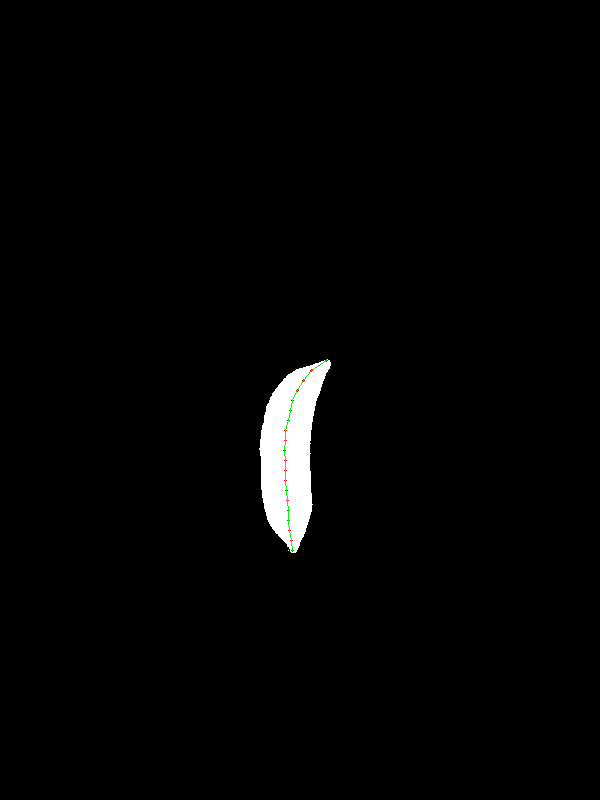

In [145]:
import cv2
import numpy as np

# Load binary image (white = 255, black = 0)
img = gray_inverted_img

# Convert to color for drawing
out = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

h, w = img.shape
center_points = []

row_step = 10  # <-- change this value to control gap (e.g., 1 = every row, 5 = every 5th row)

# Step 1: For each row, find leftmost and rightmost white pixel
for y in range(0, h, row_step):  # use step here
    x_indices = np.where(img[y] == 255)[0]  # x positions of white pixels in row y

    if len(x_indices) > 0:
        left = x_indices[0]
        right = x_indices[-1]

        # Step 2: Take midpoint
        cx = (left + right) // 2
        cy = y

        center_points.append((cx, cy))
        cv2.circle(out, (cx, cy), 1, (0, 0, 255), -1)  # draw center point

# Step 3: Connect all center points with a polyline
if len(center_points) > 1:
    cv2.polylines(out, [np.array(center_points)], False, (0, 255, 0), 1)

cv2_imshow(out)


In [146]:
import numpy as np

# center_points is a list of (x, y) from earlier step
points = np.array(center_points)

curvatures = []

for i in range(1, len(points)-1):
    x1, y1 = points[i-1]
    x2, y2 = points[i]
    x3, y3 = points[i+1]

    # First derivative approximations
    dx1, dy1 = x2 - x1, y2 - y1
    dx2, dy2 = x3 - x2, y3 - y2

    # Curvature formula (discrete version)
    num = abs(dx1 * dy2 - dy1 * dx2)
    den = ((dx1**2 + dy1**2) ** 1.5) if (dx1**2 + dy1**2) != 0 else 1e-6
    kappa = num / den

    curvatures.append(kappa)

# Example summary values
mean_curvature = np.mean(curvatures)
max_curvature = np.max(curvatures)

print("Mean curvature:", mean_curvature)
print("Max curvature:", max_curvature)


Mean curvature: 0.00965112809398011
Max curvature: 0.026362191336361963
